# Linear Regression

$$y= \theta_0 +\theta_1* x_1$$
$$salary = \theta_0+\theta_1 * experience$$

## Ordinary Least Squares
$$sum(y-\hat{y})^2\rightarrow min$$

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id = '1IaxvI7g5I68cCTbPt3gZWhpDUjkQgH0m'
downloaded = drive.CreateFile({'id': file_id})
downloaded = drive.CreateFile({'id':'1IaxvI7g5I68cCTbPt3gZWhpDUjkQgH0m'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Salary_Data.csv')  

# Read file as panda dataframe
import pandas as pd
xyz = pd.read_csv('Salary_Data.csv') 

In [8]:
print(xyz.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


## Preprocessing Data


In [9]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset 
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state = 0)
print(X.shape)
print(y.shape)
# feature scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)"""


(30, 1)
(30,)


In [10]:
print(X_train.shape)

(20, 1)


## Fitting Simple Linear Regression to the Training Set¶

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

26816.192244031183
[9345.94244312]


## Predicting the Test set results


In [0]:
y_pred = regressor.predict(X_test)

In [13]:
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [14]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Visualising the Training set Results

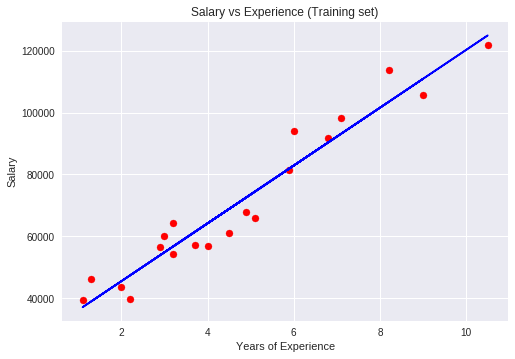

In [15]:
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set Results

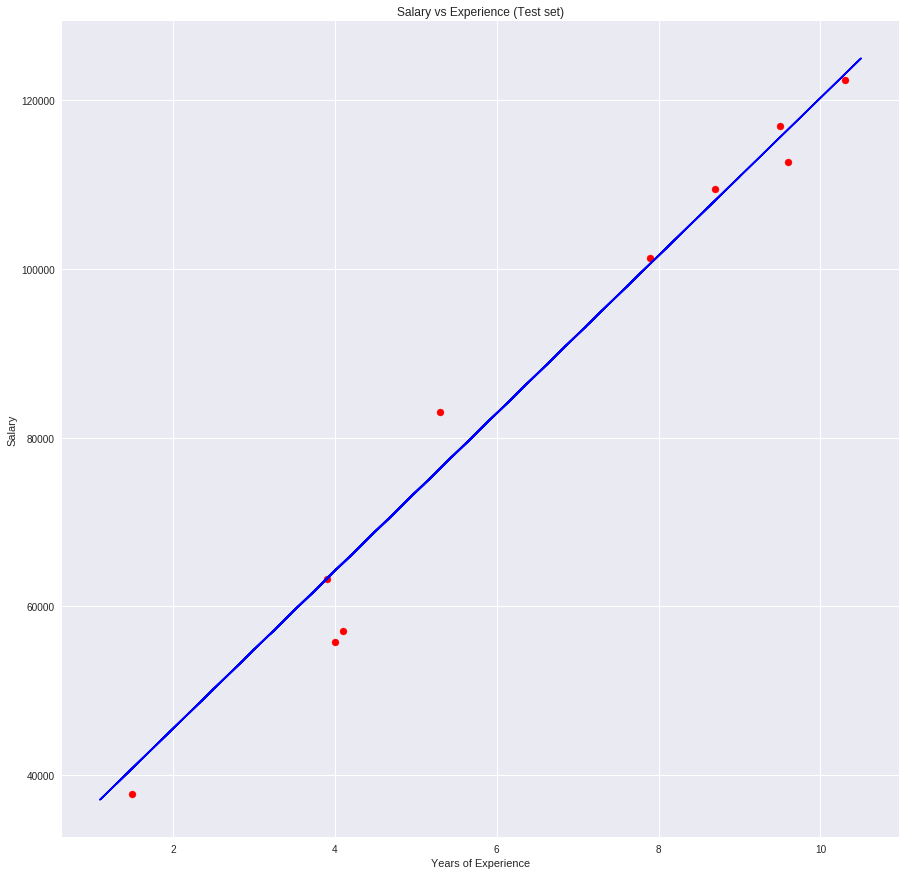

In [16]:
%matplotlib inline

# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Normal Equation

In [0]:
theta  = np.zeros((2))
ones = np.ones(X_train.shape)
X_train_one = np.concatenate((ones, X_train), axis=1)
inv_x = np.linalg.inv(np.dot(X_train_one.T,X_train_one))

In [0]:
theta_2 = np.dot(np.dot(inv_x, X_train_one.T),y_train)

In [21]:
print(theta_2)

[26816.19224403  9345.94244312]
